Jiayue Meng


Question 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima_model import ARIMA

# import data for the first question 
m1_df = pd.read_csv('C:/Users/Joyce/Desktop/DSC 275/HW3/Measurement_Q1.csv', names = ["Year", "Measurement"], header = 0)

(a)

In [2]:
x = m1_df.Year
y = m1_df.Measurement

# Develop an IMA(1,1) model for the data
model = ARIMA(m1_df.Measurement, order=(0,1,1))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:          D.Measurement   No. Observations:                  149
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -202.607
Method:                       css-mle   S.D. of innovations              0.940
Date:                Fri, 01 Oct 2021   AIC                            411.215
Time:                        15:33:04   BIC                            420.227
Sample:                             1   HQIC                           414.876
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0064      0.135     -0.048      0.962      -0.270       0.257
ma.L1.D.Measurement     0.7531      0.069     10.930      0.000       0.618       0.888
                

C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


(b)

1      2.09
2      0.07
3      1.42
4      1.47
5     -1.10
       ... 
145   -2.17
146   -0.83
147   -0.01
148   -1.17
149   -1.64
Name: Measurement, Length: 149, dtype: float64


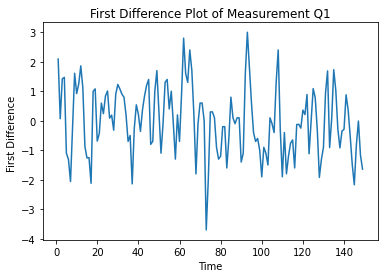

In [14]:
from statsmodels.tsa.statespace.tools import diff
# Compute the first difference of the data
m1_diff = diff(m1_df.Measurement)
print(m1_diff)

# Draw the first difference plot
plt.plot(m1_diff)
plt.xlabel('Time')
plt.ylabel('First Difference ')
plt.title('First Difference Plot of Measurement Q1')
plt.show()

(c)

In [4]:
# develop an MA(1) model on the first difference
m1_diff_MA_model = ARIMA(m1_diff, order=(0,0,1))
m1_diff_MA_model_fit = m1_diff_MA_model.fit()
# summary of fit model
print(m1_diff_MA_model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:            Measurement   No. Observations:                  149
Model:                     ARMA(0, 1)   Log Likelihood                -202.607
Method:                       css-mle   S.D. of innovations              0.940
Date:                Fri, 01 Oct 2021   AIC                            411.215
Time:                        15:33:04   BIC                            420.227
Sample:                             0   HQIC                           414.876
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0064      0.135     -0.048      0.962      -0.270       0.257
ma.L1.Measurement     0.7531      0.069     10.930      0.000       0.618       0.888
                        

C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


(d)

The model in (a) and the model in (c) are the same. For both (a) and (c), we computed the first difference of data and developed an MA(1) model. The only difference is that we did the two procedures together in IMA(1,1) in (a) and did the two procedures separately in (c). Thus, the models and model parameters are the same. 

Q2

(a)

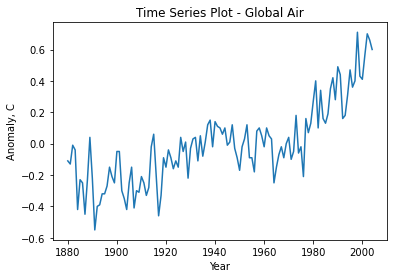

In [5]:
# import the data for Q2
air_df = pd.read_csv('C:/Users/Joyce/Desktop/DSC 275/HW3/GlobalAirTemperature.csv', names = ["Year", "Anomaly"], header = 0)

# set x as the year column and y as the Anomaly, C column
x = air_df.Year
y = air_df.Anomaly

# draw the time series plot
plt.plot (x, y)
plt.xlabel ('Year')
plt.ylabel ('Anomaly, C')
plt.title('Time Series Plot - Global Air')
plt.show()

In [21]:
# Apply an IMA(1,1) model to this data. 
model_air11 = ARIMA(air_df.Anomaly, order=(0,1,1))
model_air11_fit = model_air11.fit()
# summary of fit model
print(model_air11_fit.summary())


# Calculate the SSE by comparing the model output with the data
air_predict11 = model_air11_fit.predict (1, len(y), typ = 'levels').rename("Predictions11")

print('SSE of IMA(1,2) model is ', round(np.sum((y-air_predict11)**2), 4))

                             ARIMA Model Results                              
Dep. Variable:              D.Anomaly   No. Observations:                  124
Model:                 ARIMA(0, 1, 1)   Log Likelihood                  74.163
Method:                       css-mle   S.D. of innovations              0.133
Date:                Fri, 01 Oct 2021   AIC                           -142.326
Time:                        20:55:57   BIC                           -133.865
Sample:                             1   HQIC                          -138.889
                                                                              
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0061      0.004      1.715      0.086      -0.001       0.013
ma.L1.D.Anomaly    -0.7079      0.073     -9.680      0.000      -0.851      -0.565
                                

C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


(b)

In [25]:
# Apply an IMA(1,2) model to this data. 
model_air12 = ARIMA(air_df.Anomaly, order=(0,1,2))
model_air12_fit = model_air12.fit()
# summary of fit model
print(model_air12_fit.summary())


# Calculate the SSE by comparing the model output with the data
air_predict12 = model_air12_fit.predict (1, len(y), typ = 'levels').rename("Predictions12")

print('SSE of IMA(1,2) model is ', round(np.sum((y-air_predict12)**2), 4))


                             ARIMA Model Results                              
Dep. Variable:              D.Anomaly   No. Observations:                  124
Model:                 ARIMA(0, 1, 2)   Log Likelihood                  78.189
Method:                       css-mle   S.D. of innovations              0.128
Date:                Fri, 01 Oct 2021   AIC                           -148.379
Time:                        20:58:47   BIC                           -137.098
Sample:                             1   HQIC                          -143.796
                                                                              
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0061      0.003      2.038      0.042       0.000       0.012
ma.L1.D.Anomaly    -0.4993      0.084     -5.924      0.000      -0.664      -0.334
ma.L2.D.Anomaly    -0.2486      

C:\Users\Joyce\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


(c)

Model (b) is better suited for this data based on the SSE because SSE is smaller in model (b). SSE for model (b) is 2.057000656954908 and SSE for model (a) is 2.1895168754967504.

Q3

(a)

In [17]:
# import the data for Q3
m3_df = pd.read_csv('C:/Users/Joyce/Desktop/DSC 275/HW3/Measurement_Q3.csv', names = ["Year", "Measurement"], header = 0)

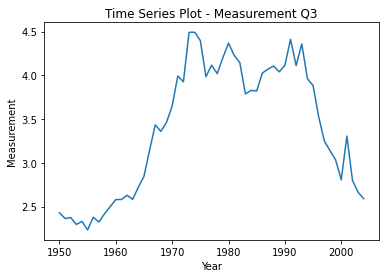

In [28]:
import statsmodels.graphics.tsaplots as st

# set x3 as the year column and y3 as the measurement column
x3 = m3_df.Year
y3 = m3_df.Measurement

# Draw the time series plot
plt.plot (x3, y3)
plt.xlabel ('Year')
plt.ylabel ('Measurement')
plt.title('Time Series Plot - Measurement Q3')
plt.show()

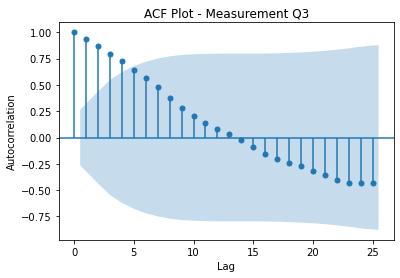

In [10]:
# Draw ACF Plot
st.plot_acf(y3, lags = 25)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('ACF Plot - Measurement Q3')
plt.show()

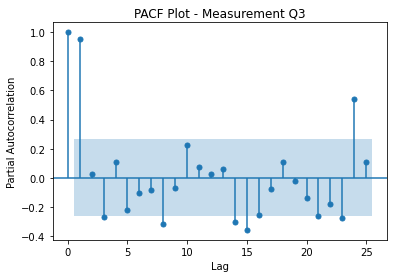

In [11]:
# Draw PACF Plot
st.plot_pacf(y3, lags=25)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation') 
plt.title('PACF Plot - Measurement Q3')
plt.show()

(b)

1    -0.066051
2     0.010941
3    -0.078785
4     0.034196
5    -0.096699
6     0.145162
7    -0.055508
8     0.093885
9     0.081643
10    0.081254
11    0.001387
12    0.048453
13   -0.047440
14    0.139087
15    0.123834
16    0.300088
17    0.288182
18   -0.074626
19    0.104202
20    0.184722
21    0.343738
22   -0.065378
23    0.565260
24    0.000579
25   -0.094974
26   -0.412076
27    0.130620
28   -0.096573
29    0.182569
30    0.166352
31   -0.139356
32   -0.082214
33   -0.359198
34    0.040682
35   -0.006997
36    0.204758
37    0.044996
38    0.035790
39   -0.066893
40    0.074951
41    0.296692
42   -0.300084
43    0.247114
44   -0.398660
45   -0.076133
46   -0.358104
47   -0.275239
48   -0.109680
49   -0.105621
50   -0.229222
51    0.499426
52   -0.506770
53   -0.135470
54   -0.072844
Name: Measurement, dtype: float64


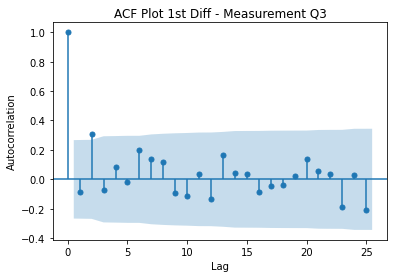

In [26]:
#Compute the first difference 
m3_diff = diff(m3_df.Measurement)
print(m3_diff)

# plot its ACF
st.plot_acf(m3_diff, lags = 25)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('ACF Plot 1st Diff - Measurement Q3')
plt.show()

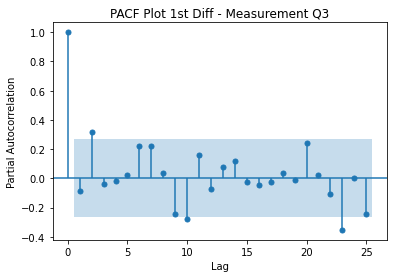

In [27]:
# plot its PACF.
st.plot_pacf(m3_diff, lags = 25)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('PACF Plot 1st Diff - Measurement Q3')
plt.show()

(c)

Based on the result in (b) above, I would recommend ARIMA(0,1,2) and ARIMA(2,1,0) for the above time series. If we depend on ACF plot, I recommend ARIMA(0,1,2): we used the first difference of the data, so d = 1. q should be 2 because ACF plot cutoffs when lag = 2. If we depend on PACF plot, I recommend ARIMA(2,1,0): we used the first difference of the data, so d = 1. p should be 2 because PACF plot cutoffs when lag = 2. 